In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [128]:
fake = pd.read_csv("Data\Fake.csv")
real = pd.read_csv("Data\True.csv")

In [129]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [130]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [131]:
fake.shape

(23481, 4)

In [132]:
real.shape

(21417, 4)

In [133]:
fake["Target"] = 0

In [134]:
real["Target"] = 1

In [227]:
fakenews = pd.concat([fake,real])

In [228]:
fakenews.head()


,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [229]:
fakenews.shape

(44898, 5)

In [230]:
fakenews = fakenews.sample(n = 44898, random_state=42).reset_index(drop=True)

In [231]:
fakenews.head(10)

,title,text,subject,date,Target
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1
5,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,"On Wednesday, Democrats took a powerful stance...",News,"June 22, 2016",0
6,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,President Trump s rally in FL on Saturday was ...,Government News,"Feb 19, 2017",0
7,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,left-news,"Mar 8, 2016",0
8,North Korea shows no sign it is serious about ...,WASHINGTON (Reuters) - The State Department sa...,worldnews,"December 13, 2017",1
9,Trump signals willingness to raise U.S. minimu...,(This version of the story corrects the figur...,politicsNews,"May 4, 2016",1


In [232]:
fakenews.shape

(44898, 5)

In [233]:
fakenews.drop_duplicates(inplace=True)

In [234]:
fakenews.shape

(44689, 5)

In [235]:
fakenews["Target"].value_counts()

0    23478
1    21211
Name: Target, dtype: int64

In [236]:
fakenews.isna().sum()

title      0
text       0
subject    0
date       0
Target     0
dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

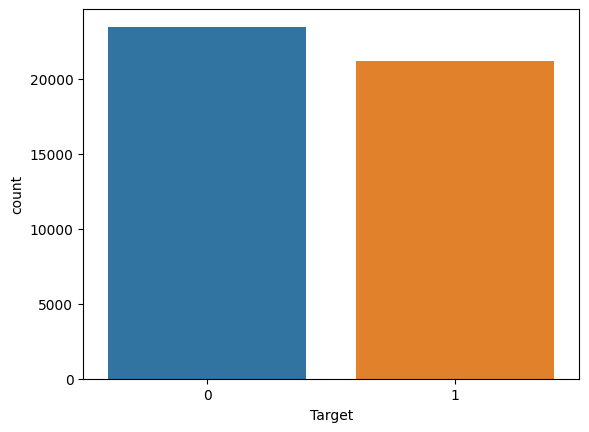

In [237]:
sns.countplot(x="Target", data = fakenews)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'US_News'),
  Text(1, 0, 'politicsNews'),
  Text(2, 0, 'News'),
  Text(3, 0, 'Government News'),
  Text(4, 0, 'left-news'),
  Text(5, 0, 'worldnews'),
  Text(6, 0, 'politics'),
  Text(7, 0, 'Middle-east')])

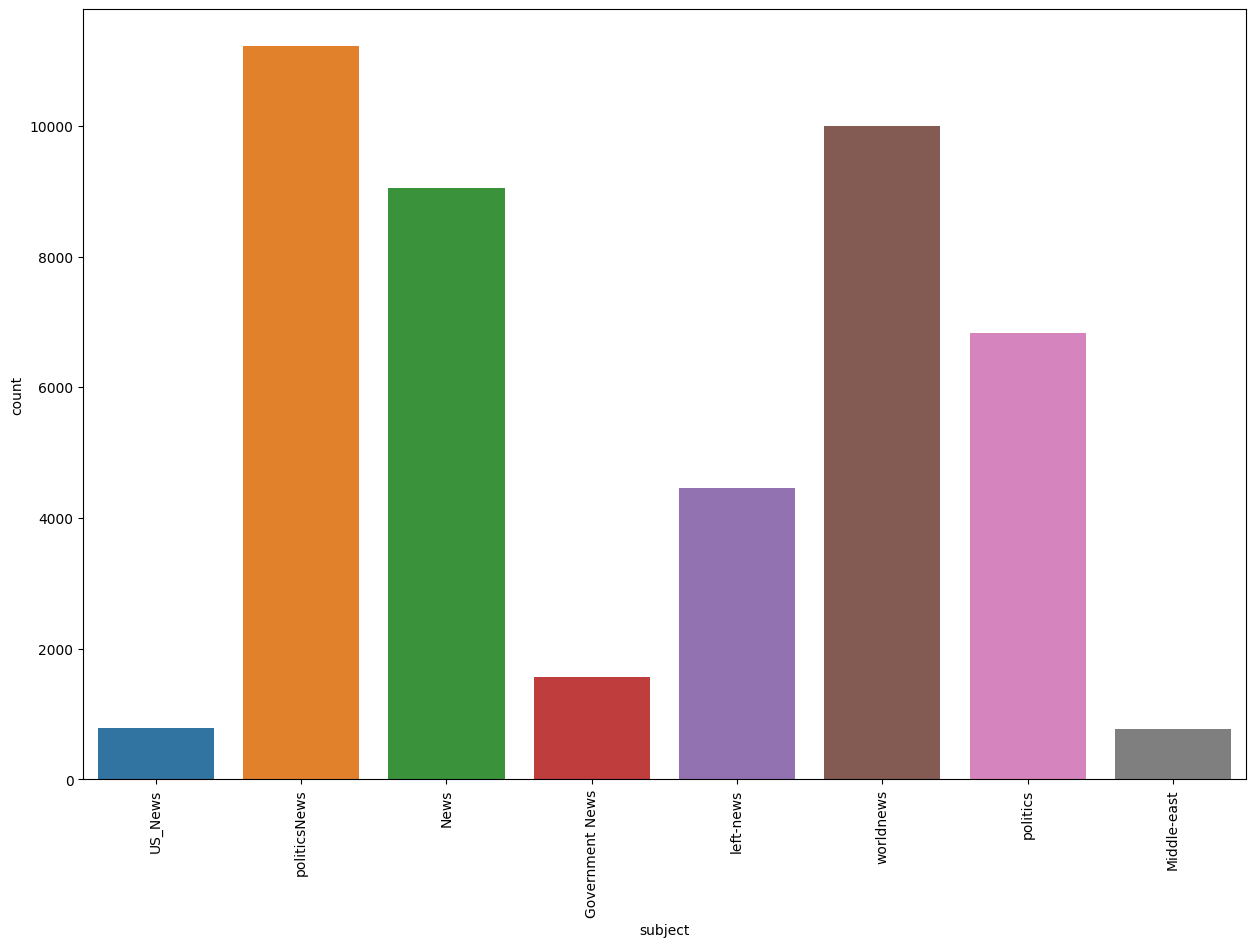

In [238]:
plt.figure(figsize=(15,10))
sns.countplot(x="subject" ,data = fakenews)
plt.xticks(rotation=90)

In [239]:
fakenews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   Target   44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [240]:
fakenews = fakenews.drop(["title","subject","date"],axis=1)

In [241]:
fakenews.head(10)

,text,Target
0,"21st Century Wire says Ben Stein, reputable pr...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,"On Monday, Donald Trump once again embarrassed...",0
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1
5,"On Wednesday, Democrats took a powerful stance...",0
6,President Trump s rally in FL on Saturday was ...,0
7,He s been Europe s version of the outspoken Te...,0
8,WASHINGTON (Reuters) - The State Department sa...,1
9,(This version of the story corrects the figur...,1


In [242]:
def cleaning(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ' ,text)
    text = text.split()
    
    return text
fakenews['text'] = fakenews['text'].apply(cleaning)

In [243]:
fakenews.head(20)

,text,Target
0,"[st, century, wire, says, ben, stein, reputabl...",0
1,"[washington, reuters, u, s, president, donald,...",1
2,"[reuters, puerto, rico, governor, ricardo, ros...",1
3,"[on, monday, donald, trump, once, again, embar...",0
4,"[glasgow, scotland, reuters, most, u, s, presi...",1
5,"[on, wednesday, democrats, took, a, powerful, ...",0
6,"[president, trump, s, rally, in, fl, on, satur...",0
7,"[he, s, been, europe, s, version, of, the, out...",0
8,"[washington, reuters, the, state, department, ...",1
9,"[this, version, of, the, story, corrects, the,...",1


In [244]:
fakenews[fakenews['text'].map(lambda d: len(d)) > 0]

,text,Target
0,"[st, century, wire, says, ben, stein, reputabl...",0
1,"[washington, reuters, u, s, president, donald,...",1
2,"[reuters, puerto, rico, governor, ricardo, ros...",1
3,"[on, monday, donald, trump, once, again, embar...",0
4,"[glasgow, scotland, reuters, most, u, s, presi...",1
...,...,...
44892,"[miss, universe, alicia, machado, is, now, an,...",0
44894,"[london, tokyo, reuters, british, prime, minis...",1
44895,"[berlin, reuters, chancellor, angela, merkel, ...",1
44896,"[jesus, f, cking, christ, our, president, is, ...",0


In [202]:
fakenews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44689 non-null  object
 1   Target  44689 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [203]:
stop = set(stopwords.words('english'))

fakenews['text'] = fakenews['text'].apply(lambda x: [item for item in x if item not in stop])


In [205]:
fakenews['text'] = fakenews['text'].str.join(" ")


In [154]:
fakenews.head(20)

,text,Target
0,st century wire says ben stein reputable profe...,0
1,washington reuters u president donald trump re...,1
2,reuters puerto rico governor ricardo rossello ...,1
3,monday donald trump embarrassed country accide...,0
4,glasgow scotland reuters u presidential candid...,1
5,wednesday democrats took powerful stance gop r...,0
6,president trump rally fl saturday smashing suc...,0
7,europe version outspoken ted cruz time nigel f...,0
8,washington reuters state department said wedne...,1
9,version story corrects figure current minimum ...,1


In [35]:
fakenews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44689 non-null  object
 1   Target  44689 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [155]:
X = fakenews["text"]
y = fakenews["Target"]

In [156]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


In [169]:
#vectorizer.get_feature_names()

In [173]:
#vectorizer.vocabulary_.items()


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [159]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [160]:
lr_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, lr_pred)*100


98.64852770070706

In [161]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52      5861
           1       0.47      0.47      0.47      5312

    accuracy                           0.50     11173
   macro avg       0.50      0.50      0.50     11173
weighted avg       0.50      0.50      0.50     11173



In [162]:
#MultinomialNB

In [163]:
nb=MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [164]:
nb_pred = nb.predict(X_test)
metrics.accuracy_score(y_test, nb_pred)*100


93.5827441152779

In [165]:
print(metrics.classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5861
           1       0.94      0.92      0.93      5312

    accuracy                           0.94     11173
   macro avg       0.94      0.94      0.94     11173
weighted avg       0.94      0.94      0.94     11173



In [166]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [167]:
dt_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, dt_pred)*100

99.66884453593484

In [168]:
print(metrics.classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5861
           1       1.00      1.00      1.00      5312

    accuracy                           1.00     11173
   macro avg       1.00      1.00      1.00     11173
weighted avg       1.00      1.00      1.00     11173

